# Capstone Project

In [1]:
##Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoderfrom sklearn.ensemble import RandomForestClassifierfrom sklearn.model_selection import train_test_splitfrom sklearn.metrics import accuracy_score

In [2]:
##Read data file that will be used for the project
df = pd.read_csv('data/flight_delays.csv')
df.head()          

,FlightID,Airline,FlightNumber,Origin,Destination,ScheduledDeparture,ActualDeparture,ScheduledArrival,ActualArrival,DelayMinutes,DelayReason,Cancelled,Diverted,AircraftType,TailNumber,Distance
0,1,United,4558,ORD,MIA,2024-09-01 08:11,2024-09-01 08:30,2024-09-01 12:11,2024-09-01 12:19,8,Weather,True,False,Boeing 737,N71066,1031
1,2,Delta,8021,LAX,MIA,2024-09-01 10:25,2024-09-01 10:41,2024-09-01 13:25,2024-09-01 13:27,2,Air Traffic Control,True,True,Airbus A320,N22657,1006
2,3,Southwest,7520,DFW,SFO,2024-09-01 16:53,2024-09-01 17:05,2024-09-01 17:53,2024-09-01 18:07,14,Weather,True,True,Boeing 737,N95611,2980
3,4,Delta,2046,ORD,BOS,2024-09-01 14:44,2024-09-01 15:04,2024-09-01 18:44,2024-09-01 18:34,-10,NaN,False,False,Boeing 777,N90029,1408
4,5,Delta,6049,LAX,SEA,2024-09-01 01:51,2024-09-01 02:08,2024-09-01 05:51,2024-09-01 06:15,24,Air Traffic Control,False,True,Boeing 737,N27417,2298


In [22]:
##No.of Records and Columns in the file 
df.shape

(1747627, 16)

In [23]:
##Structure of the file 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747627 entries, 0 to 1747626
Data columns (total 16 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   FlightID            int64 
 1   Airline             object
 2   FlightNumber        int64 
 3   Origin              object
 4   Destination         object
 5   ScheduledDeparture  object
 6   ActualDeparture     object
 7   ScheduledArrival    object
 8   ActualArrival       object
 9   DelayMinutes        int64 
 10  DelayReason         object
 11  Cancelled           bool  
 12  Diverted            bool  
 13  AircraftType        object
 14  TailNumber          object
 15  Distance            int64 
dtypes: bool(2), int64(4), object(10)
memory usage: 190.0+ MB


In [5]:
# Dropping the columns as these will not be used for modeling
df = df.drop(columns=['FlightID', 'TailNumber'])

In [25]:
##Find out number of nulls in each column
df.isnull().sum()

Airline                    0
FlightNumber               0
Origin                     0
Destination                0
ScheduledDeparture         0
ActualDeparture            0
ScheduledArrival           0
ActualArrival              0
DelayMinutes               0
DelayReason           468873
Cancelled                  0
Diverted                   0
AircraftType               0
Distance                   0
dtype: int64

In [3]:
## Update missing values NaN with Other reasons
# Fill NaN values in DelayReason with 'Other Reasons'
df['DelayReason'] = df['DelayReason'].fillna('Other Reasons')

In [4]:
# Count NaN value after filling values for Delay Reasons = 'Other Reasons'
nan_counts = df[df['DelayReason'].isna()].groupby('Airline').size().reset_index(name='Count')
nan_counts['DelayReason'] = 'NaN'
nan_counts.shape
nan_counts.head()

,Airline,Count,DelayReason


In [5]:
##Find out number of Unique Airlines in the data set
# Get distinct airlines
distinct_airlines = df['Airline'].unique()

# Print the distinct airlines
print(distinct_airlines)
# Count occurrences of each delay reason by airline, including NaN
delay_counts = df.groupby(['Airline', 'DelayReason']).size().reset_index(name='Count')
delay_counts.head()

['United' 'Delta' 'Southwest' 'American Airlines']


,Airline,DelayReason,Count
0,American Airlines,Air Traffic Control,106334
1,American Airlines,Maintenance,106893
2,American Airlines,Other Reasons,117579
3,American Airlines,Weather,106318
4,Delta,Air Traffic Control,106507


In [6]:
# Combine the counts into a single DataFrame
combined_counts = pd.concat([delay_counts, nan_counts], ignore_index=True)

# Display the unique delay reasons along with their counts for each airline
print("Unique Delay Reasons and their Counts by Airline (including NaN):")
for index, row in combined_counts.iterrows():
    print(f"{row['Airline']} - {row['DelayReason']}: {row['Count']}")


Unique Delay Reasons and their Counts by Airline (including NaN):
American Airlines - Air Traffic Control: 106334
American Airlines - Maintenance: 106893
American Airlines - Other Reasons: 117579
American Airlines - Weather: 106318
Delta - Air Traffic Control: 106507
Delta - Maintenance: 106546
Delta - Other Reasons: 117022
Delta - Weather: 106605
Southwest - Air Traffic Control: 107427
Southwest - Maintenance: 106114
Southwest - Other Reasons: 117415
Southwest - Weather: 106765
United - Air Traffic Control: 106220
United - Maintenance: 106615
United - Other Reasons: 116857
United - Weather: 106410


In [ ]:
df.head()

In [7]:
# Calculate delay in minutes
df['DelayMinutes'] = (df['ActualDeparture'] - df['ScheduledDeparture']).dt.total_seconds() / 60

# Group by airline and find the maximum delay
max_delay_by_airline = df.groupby('Airline')['DelayMinutes'].max().reset_index()

# Print the result
print(max_delay_by_airline)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

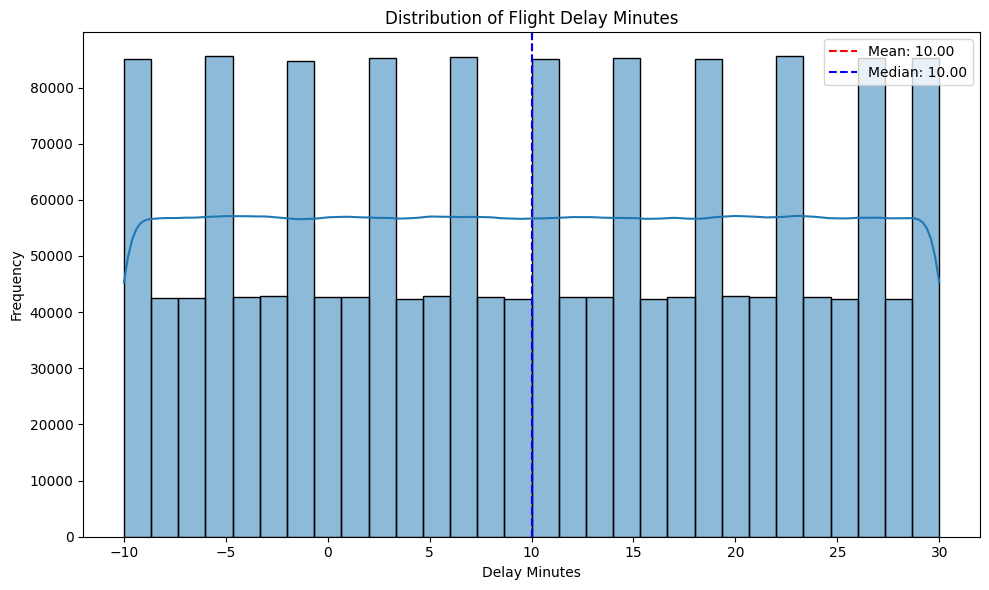

In [8]:
# Plotting the distribution of DelayMinutes
plt.figure(figsize=(10, 6))
sns.histplot(df['DelayMinutes'], bins=30, kde=True)

# Add title and labels
plt.title('Distribution of Flight Delay Minutes')
plt.xlabel('Delay Minutes')
plt.ylabel('Frequency')

# Optional: Add mean or median lines
mean_delay = df['DelayMinutes'].mean()
median_delay = df['DelayMinutes'].median()
plt.axvline(mean_delay, color='red', linestyle='--', label=f'Mean: {mean_delay:.2f}')
plt.axvline(median_delay, color='blue', linestyle='--', label=f'Median: {median_delay:.2f}')

# Add legend
plt.legend()

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/flight_delay_distribution.png')

# Show the plot
plt.show()


Numeric Columns: ['FlightNumber', 'DelayMinutes', 'Distance']


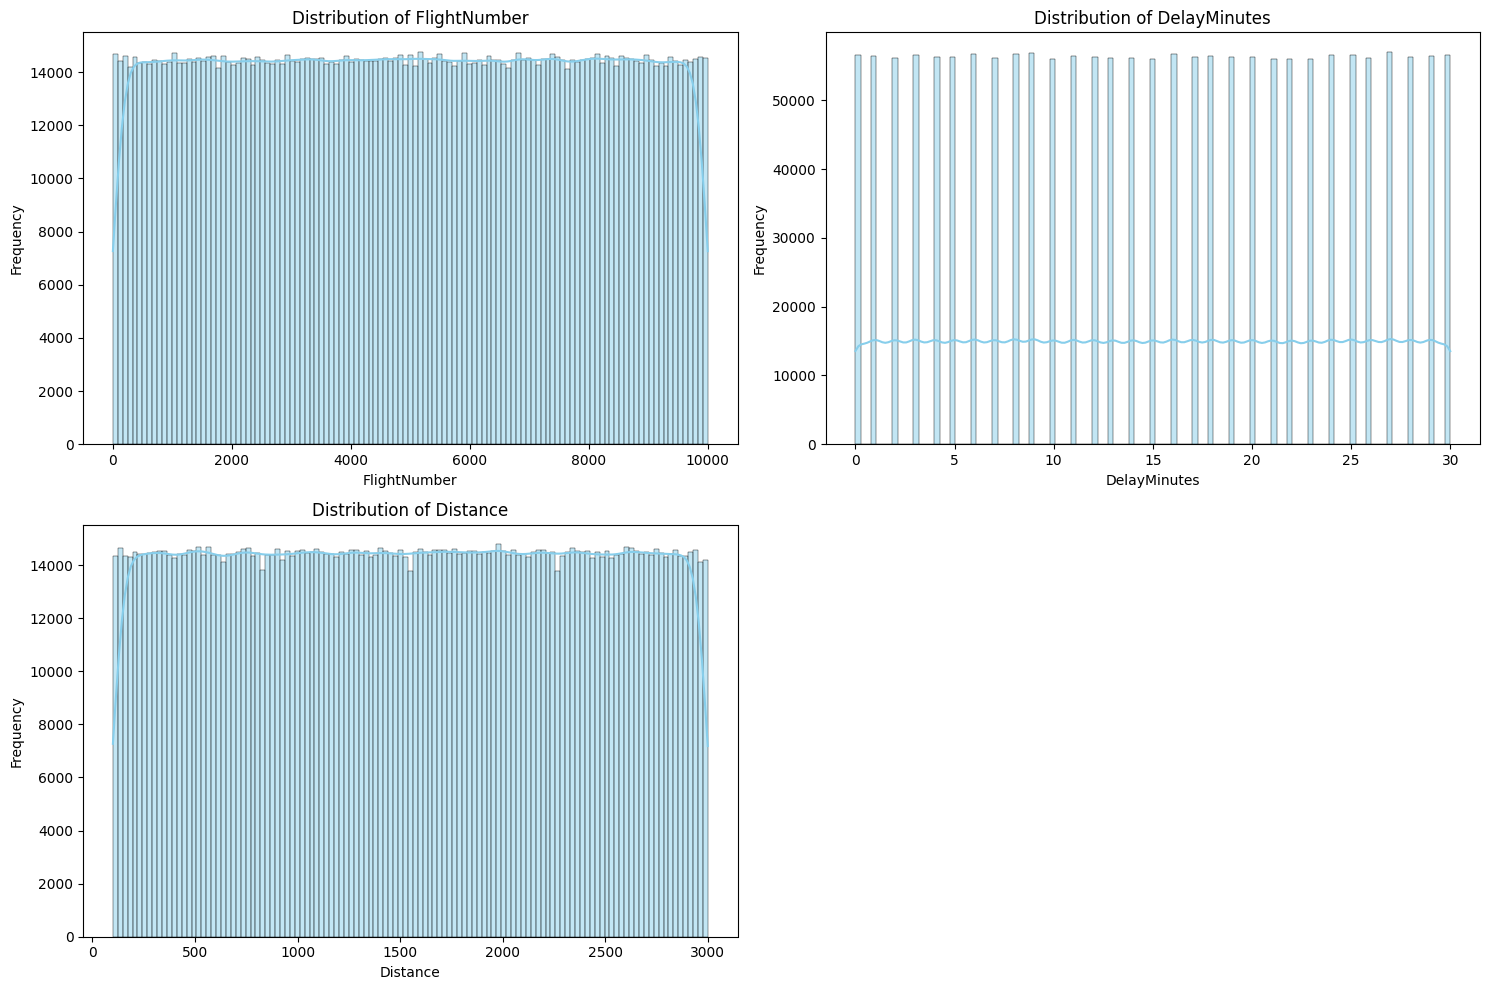

In [18]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Numeric Columns:", numeric_cols)
# Plotting distributions of numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/numeric_feature_distributions.png')

# Show the plots
plt.show()

Categorical Columns: ['Airline', 'Origin', 'Destination', 'ScheduledDeparture', 'ActualDeparture', 'ScheduledArrival', 'ActualArrival', 'DelayReason', 'AircraftType', 'TailNumber']


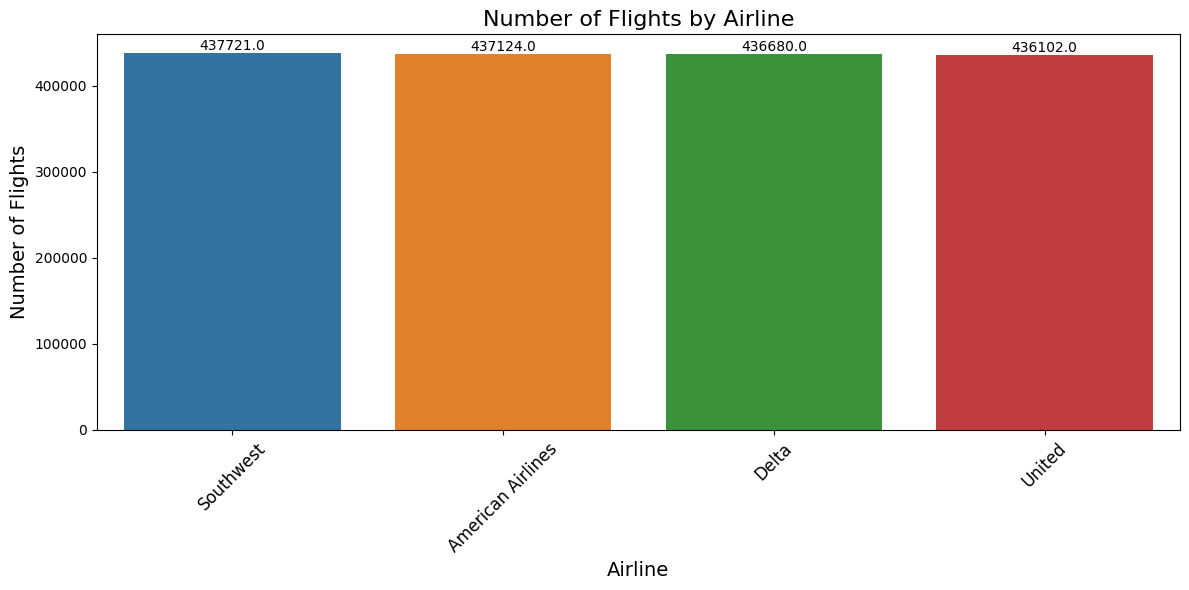

In [9]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Plotting the count of flights by Airline
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)

# Adding title and labels
plt.title('Number of Flights by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Optional: Add data labels above bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/flights_by_airline.png')

# Show the plot
plt.show()

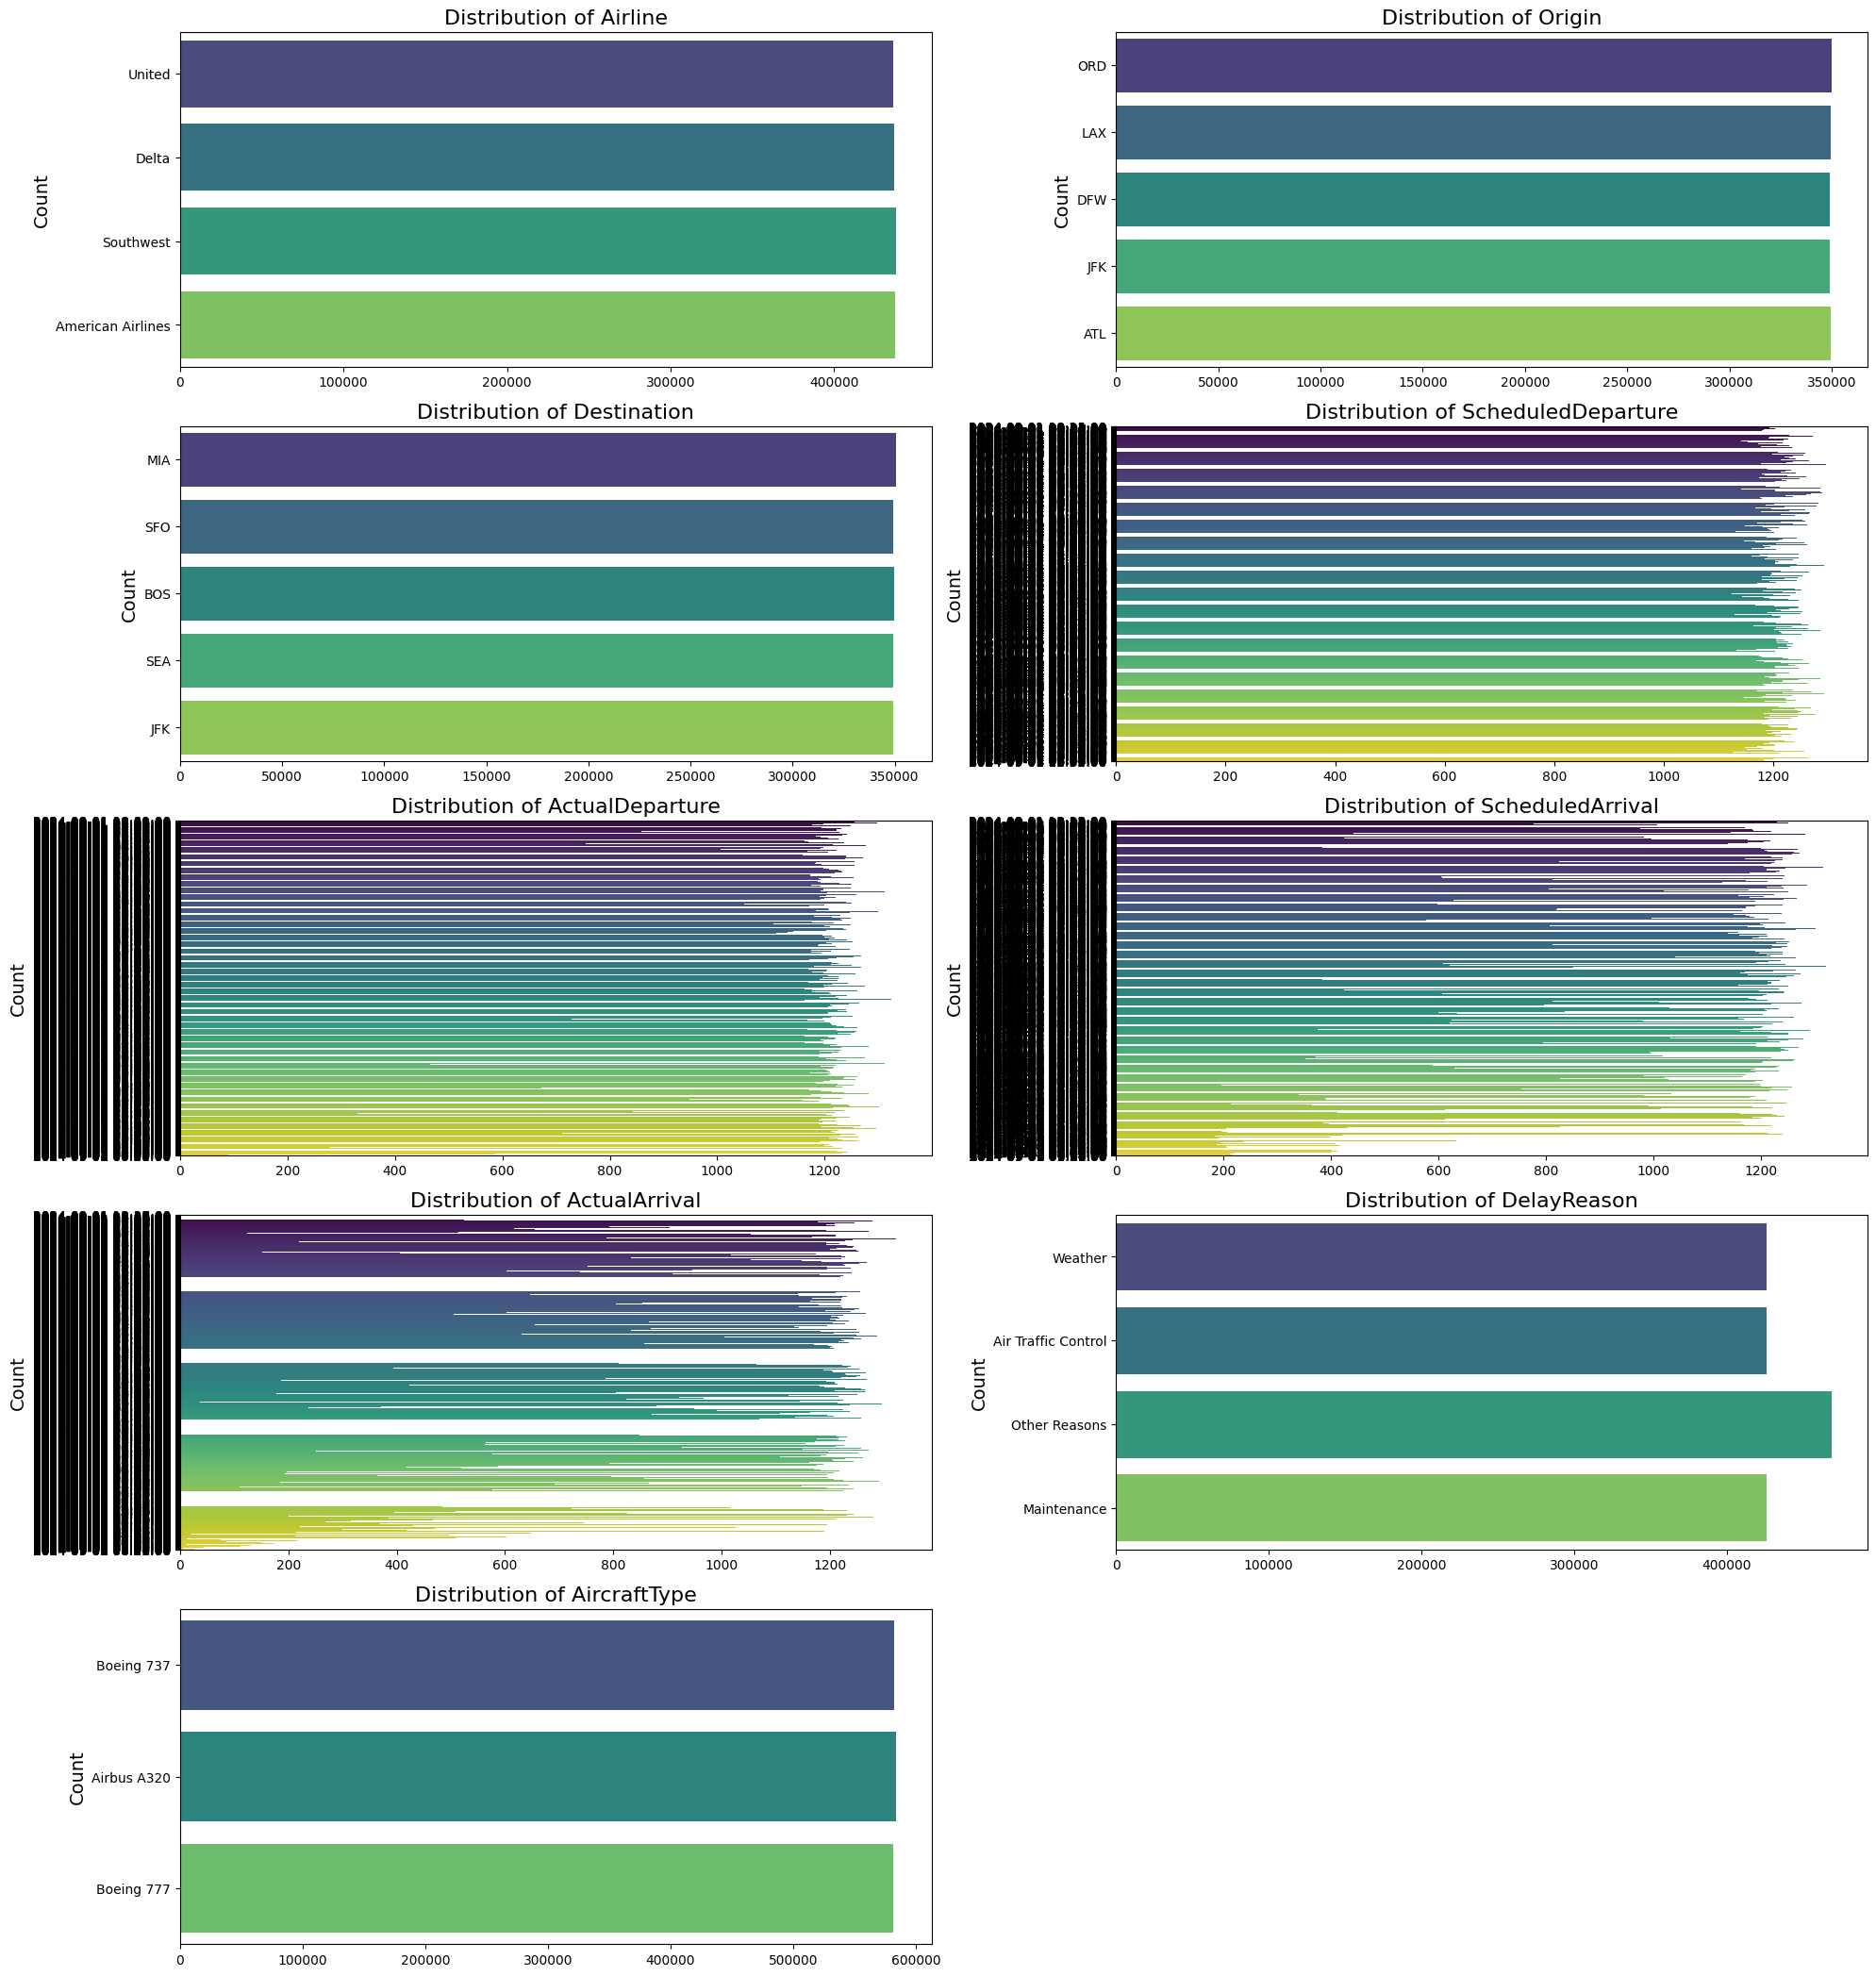

In [20]:
# Plotting distributions of categorical features specific to the airline industry
plt.figure(figsize=(20, 25))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(6, 2, i)
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Count', fontsize=14)

plt.tight_layout()

# Save the figure in the data folder
plt.savefig('data/categorical_feature_distributions.png')

# Show the plots
plt.show()

In [10]:
# Identify boolean columns includes True/False values
boolean_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Identify datetime columns includes columns with date and time information
# convert scheduled and actual departure/arrival times to datetime type
df['ScheduledDeparture'] = pd.to_datetime(df['ScheduledDeparture'])
df['ActualDeparture'] = pd.to_datetime(df['ActualDeparture'])
df['ScheduledArrival'] = pd.to_datetime(df['ScheduledArrival'])
df['ActualArrival'] = pd.to_datetime(df['ActualArrival'])

datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print("Boolean Columns:", boolean_cols)           
print("Datetime Columns:", datetime_cols)       


Boolean Columns: ['Cancelled', 'Diverted']
Datetime Columns: ['ScheduledDeparture', 'ActualDeparture', 'ScheduledArrival', 'ActualArrival']


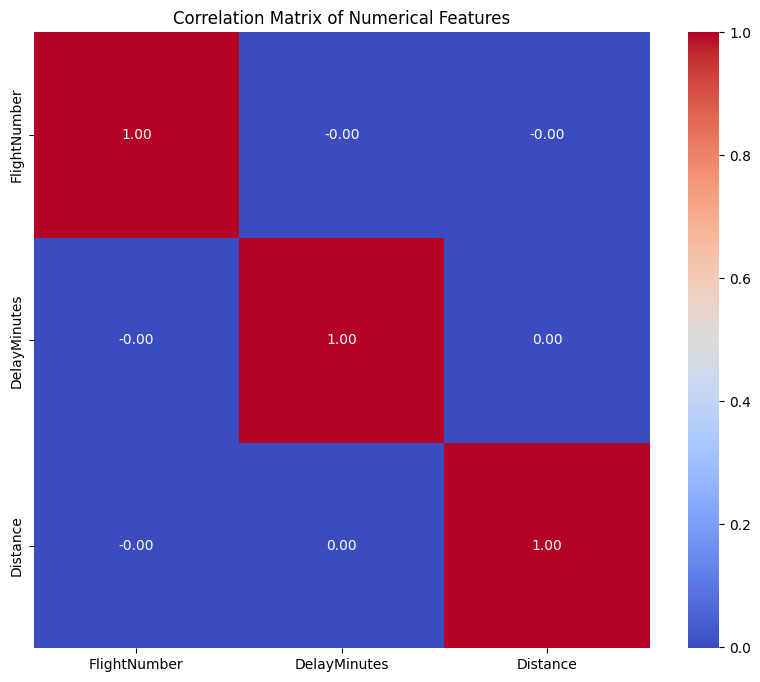

In [21]:
# Correlation Analysis for numerical features
corr_matrix = df[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')

# Save the figure in the data folder
plt.savefig('data/correlation_matrix.png')

plt.show()


In [11]:
df.describe()

# Format values to 2 decimal places
formatted_df = df.describe().copy()

formatted_df.iloc[:, 1:] = formatted_df.iloc[:, 1:].applymap(lambda x: f"{x:.2f}")

# Display the formatted DataFrame
print(formatted_df)



           FlightID FlightNumber ScheduledDeparture ActualDeparture   
count  1.747627e+06   1747627.00         1747627.00      1747627.00  \
mean   8.738140e+05      5001.16                .2f             .2f   
min    1.000000e+00         1.00                .2f             .2f   
25%    4.369075e+05      2503.00                .2f             .2f   
50%    8.738140e+05      5002.00                .2f             .2f   
75%    1.310720e+06      7499.00                .2f             .2f   
max    1.747627e+06      9999.00                .2f             .2f   
std    5.044966e+05      2885.82                nan             nan   

      ScheduledArrival ActualArrival DelayMinutes    Distance  
count       1747627.00    1747627.00   1747627.00  1747627.00  
mean               .2f           .2f        10.00     1549.94  
min                .2f           .2f       -10.00      100.00  
25%                .2f           .2f         0.00      825.00  
50%                .2f           .2f    

In [ ]:
# Create a scatter plot to visualize the relationship between DelayMinutes and Distance
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Distance', y='DelayMinutes', alpha=0.5, color='blue')

# Adding titles and labels
plt.title('Delay Minutes vs. Distance', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Delay Minutes', fontsize=14)

# Optional: Add a regression line to visualize trends
sns.regplot(data=df, x='Distance', y='DelayMinutes', scatter=False, color='red', line_kws={"label": "Regression Line"})

# Add a legend
plt.legend()

# Save the figure in the data folder
plt.savefig('data/delay_vs_distance.png')

# Show the plot
plt.show()

In [40]:
# Calculate the number of cancelled, delayed, diverted, and on-time flights for each airline
cancelled_flights_count = df.groupby('Airline')['Cancelled'].sum().reset_index(name='CancelledCount')

delayed_flights_count = df[df['DelayMinutes'] > 0].groupby('Airline')['DelayMinutes'].count().reset_index(name='DelayedCount')

diverted_flights_count = df.groupby('Airline')['Diverted'].sum().reset_index(name='DivertedCount')

# Calculate on-time flights
ontime_flights_count = df[(df['Cancelled'] == False) & (df['DelayMinutes'] <= 0)].groupby('Airline').size().reset_index(name='OnTimeCount')

# Merge all counts into a single DataFrame
combined_counts = (cancelled_flights_count
                   .merge(delayed_flights_count, on='Airline', how='outer')
                   .merge(diverted_flights_count, on='Airline', how='outer')
                   .merge(ontime_flights_count, on='Airline', how='outer'))

# Display the results
print("Number of Flights Cancelled, Delayed, Diverted, and On-Time by Each Airline:")
print(combined_counts)


Number of Flights Cancelled, Delayed, Diverted, and On-Time by Each Airline:
             Airline  CancelledCount  DelayedCount  DivertedCount  OnTimeCount
0  American Airlines          218807        319545         218954        58541
1              Delta          218209        319658         217857        58474
2          Southwest          218357        320306         218683        58464
3             United          217820        319245         217899        58532


In [ ]:
##Use of seaborn 
import seaborn as sns

# Count delays by airline
delay_counts = df.groupby('Airline')['DelayMinutes'].count().reset_index()
delay_counts.columns = ['Airline', 'DelayCount']

# Set up the visualization
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=delay_counts, x='Airline', y='DelayCount', palette='viridis')

# Add titles and labels
plt.title('Count of Delays by Airline', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Add count labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', 
                      fontsize=12, color='black', 
                      xytext=(0, 5),  # 5 points vertical offset
                      textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_304/2958086153.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
/home/codio/.pyenv/versions/3.11.2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


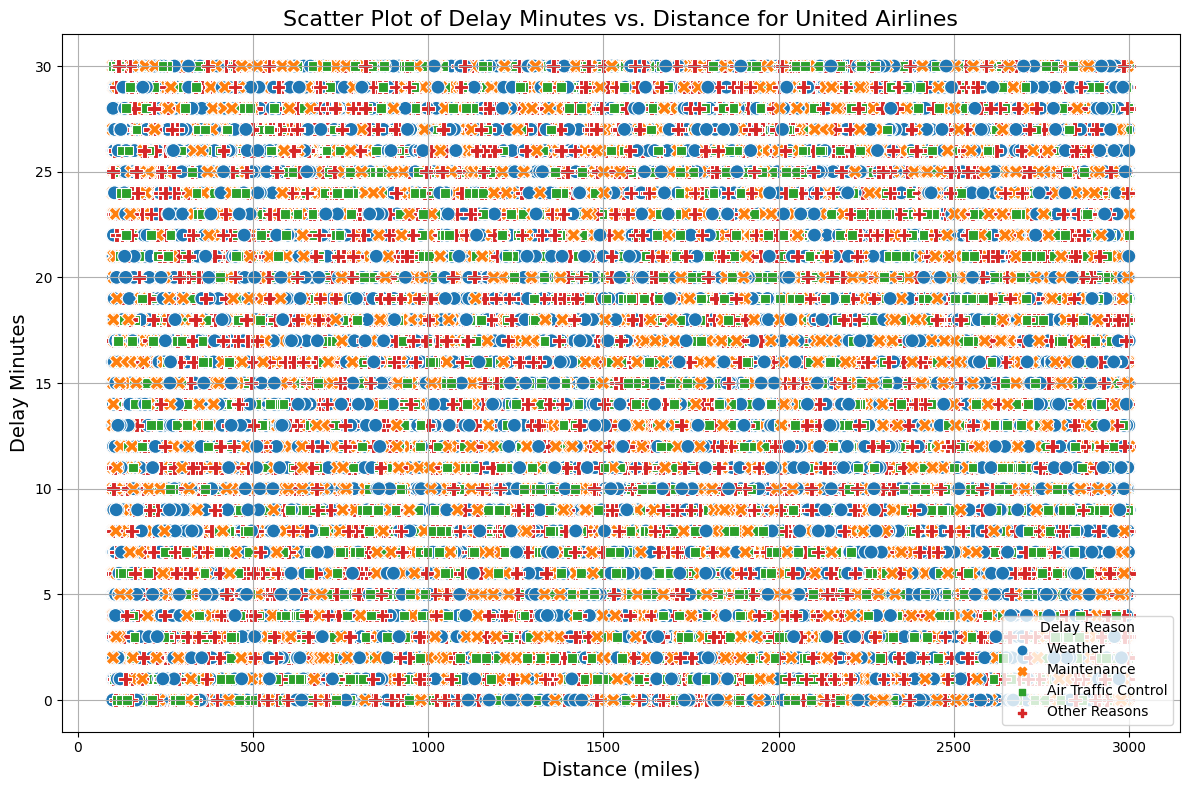

In [28]:

# Filter for United Airlines only
united_df = df[df['Airline'] == 'United']

# Create scatter plots for each delay reason
plt.figure(figsize=(12, 8))

sns.scatterplot(data=united_df, x='Distance', y='DelayMinutes', hue='DelayReason', style='DelayReason', s=100)

plt.title('Scatter Plot of Delay Minutes vs. Distance for United Airlines', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Delay Minutes', fontsize=14)
plt.legend(title='Delay Reason')
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [29]:
# Optionally, filter for United Airlines flights
united_flights = df[df['Airline'] == 'United']
print("\nUnited Airlines Flights:")
print(united_flights[['FlightNumber', 'Origin', 'Destination', 'ScheduledDeparture', 'ActualDeparture']])


United Airlines Flights:
         FlightNumber Origin Destination  ScheduledDeparture   
0                4558    ORD         MIA 2024-09-01 08:11:00  \
12               9966    DFW         SFO 2024-09-01 05:33:00   
13                598    ATL         SEA 2024-09-01 07:30:00   
16               2978    LAX         MIA 2024-09-01 16:23:00   
17               2966    JFK         SEA 2024-09-01 03:04:00   
...               ...    ...         ...                 ...   
1747616           354    JFK         SFO 2024-09-01 04:48:00   
1747617          7308    ORD         MIA 2024-09-01 21:01:00   
1747622          4145    DFW         MIA 2024-09-01 12:46:00   
1747623          2155    ATL         SEA 2024-09-01 20:43:00   
1747626          1319    LAX         MIA 2024-09-01 12:46:00   

            ActualDeparture  
0       2024-09-01 08:30:00  
12      2024-09-01 05:58:00  
13      2024-09-01 07:31:00  
16      2024-09-01 16:48:00  
17      2024-09-01 03:11:00  
...                     .

In [ ]:
flights_df = pd.DataFrame(df)

# Convert departure and arrival times to datetime
flights_df['ActualDeparture'] = pd.to_datetime(flights_df['ActualDeparture'])
flights_df['ActualArrival'] = pd.to_datetime(flights_df['ActualArrival'])

# Calculate time taken in minutes
flights_df['TimeTakenMinutes'] = (flights_df['ActualArrival'] - flights_df['ActualDeparture']).dt.total_seconds() / 60

# Filter for United Airlines flights
united_flights = flights_df[flights_df['Airline'] == 'United']

# Group and sort by distance
grouped_flights = united_flights.sort_values(by='Distance', ascending=False)

# Display the relevant information
print("United Airlines Flights (Longest to Shortest Distance):")
print(grouped_flights[['FlightNumber', 'Origin', 'Destination', 'Distance', 'TimeTakenMinutes']])

In [ ]:

# Filter for United Airlines flights
united_flights = flights_df[flights_df['Airline'] == 'United']

# Define distance bins and labels
bins = [0, 500, 1000, 6000]
labels = ['100-500', '501-1000', '1001-6000']

# Create a new column for distance bins
united_flights['DistanceGroup'] = pd.cut(united_flights['Distance'], bins=bins, labels=labels, right=False)

# Count the number of flights in each distance group
distance_counts = united_flights['DistanceGroup'].value_counts().sort_index()

# Create a bar plot for distance groups
plt.figure(figsize=(8, 5))
distance_counts.plot(kind='bar', color='skyblue')
plt.title('Number of United Airlines Flights by Distance Group')
plt.xlabel('Distance Group (miles)')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# Convert departure and arrival times to datetime
flights_df['ActualDeparture'] = pd.to_datetime(flights_df['ActualDeparture'])
flights_df['ActualArrival'] = pd.to_datetime(flights_df['ActualArrival'])

# Calculate time taken in minutes
flights_df['TimeTakenMinutes'] = (flights_df['ActualArrival'] - flights_df['ActualDeparture']).dt.total_seconds() / 60

# Define distance bins and labels
bins = [0, 500, 1000, 6000]
labels = ['100-500', '501-1000', '1001-6000']

# Create a new column for distance bins and plot for each airline
airlines = flights_df['Airline'].unique()

for airline in airlines:
    airline_flights = flights_df[flights_df['Airline'] == airline]
    airline_flights['DistanceGroup'] = pd.cut(airline_flights['Distance'], bins=bins, labels=labels, right=False)
    
    distance_counts = airline_flights['DistanceGroup'].value_counts().sort_index()

    # Create a bar plot for distance groups
    plt.figure(figsize=(8, 5))
    distance_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Number of {airline} Flights by Distance Group')
    plt.xlabel('Distance Group (miles)')
    plt.ylabel('Number of Flights')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
##Perform Label encoding
## Perform hot-encoding

In [ ]:

# Perform one-hot encoding on categorical columns
df_encoded = pd.get_dummies(df, columns=['Airline', 'Origin', 'Destination', 'DelayReason', 'AircraftType'], drop_first=True)

# Display the encoded DataFrame
print(df_encoded.head())

In [ ]:
# Initialize LabelEncoders
le_airline = LabelEncoder()
le_origin = LabelEncoder()
le_destination = LabelEncoder()
le_delay_reason = LabelEncoder()
le_aircraft_type = LabelEncoder()

# Fit and transform the categorical columns
df['Airline'] = le_airline.fit_transform(df['Airline'])
df['Origin'] = le_origin.fit_transform(df['Origin'])
df['Destination'] = le_destination.fit_transform(df['Destination'])
df['DelayReason'] = df['DelayReason'].fillna('Unknown')  # Handle NaN values
df['DelayReason'] = le_delay_reason.fit_transform(df['DelayReason'])
df['AircraftType'] = le_aircraft_type.fit_transform(df['AircraftType'])

# Display the encoded DataFrame
print(df.head())

In [34]:
#Pre-Processing
# Split the dataset into features and target variable
X = df.drop(columns=['DelayMinutes'])  # Features
y = df['DelayMinutes']                  # Target variable

# Create train and test datasets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the results
print("Training Features:\n", X_train)
print("Testing Features:\n", X_test)
print("Training Target:\n", y_train)
print("Testing Target:\n", y_test)


Training Features:
          Airline  FlightNumber  Origin  Destination  ScheduledDeparture   
1124842        3          7866       4            4 2024-09-01 22:27:00  \
915862         3          6413       1            4 2024-09-01 12:11:00   
33706          3          6710       0            1 2024-09-01 11:14:00   
146559         3          5089       0            4 2024-09-01 17:40:00   
660177         3          1340       3            0 2024-09-01 12:06:00   
...          ...           ...     ...          ...                 ...   
259178         2          4661       1            4 2024-09-01 13:16:00   
1414414        2          4197       2            0 2024-09-01 21:42:00   
131932         3          3866       4            0 2024-09-01 14:42:00   
671155         0          1745       4            2 2024-09-01 21:15:00   
121958         3          9333       0            4 2024-09-01 13:00:00   

            ActualDeparture    ScheduledArrival       ActualArrival   
1124842 

In [ ]:
# Create a binary target variable: 1 if delayed (DelayMinutes > 0), else 0
df['Delayed'] = (df['DelayMinutes'] > 0).astype(int)

# Define features and target variable
X = df.drop(columns=['DelayMinutes', 'Delayed'])  # Features
y = df['Delayed']                                  # Target variable


In [ ]:

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Step 3: Model Selection and Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Step 4: Model Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))